In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

In [ ]:

games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

In [ ]:
import pandas as pd

games = pd.read_csv("games.csv")
print(games.columns)

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'homeGoals', 'awayGoals', 'homeProbability', 'drawProbability',
       'awayProbability', 'homeGoalsHalfTime', 'awayGoalsHalfTime', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD',
       'PSCA'],
      dtype='object')


In [ ]:
import pandas as pd

leagues = pd.read_csv("leagues.csv")
print(leagues.columns)

Index(['leagueID', 'name', 'understatNotation'], dtype='object')


In [ ]:
registros_por_temporada = games.groupby("season")["gameID"].count().reset_index()

# Ligas nuevas por temporada
leagues["season"] = leagues["leagueID"].astype(str).str[:4].astype(int)  # Extraer la temporada del ID de la liga
ligas_nuevas_por_temporada = leagues.groupby("season")["name"].nunique().reset_index()

# 1. ¿Qué variable clave no está presente y sería valiosa incorporar? ¿Cómo la obtendrías?


El dataset contiene informacion y algunas probabilidades sobre los marcadores y apuestas, sin embargo seria interesante poder ver la proporcion de estas contra los resultados reales de los partidos, es decir, que una posible variable sea " Desenlace final de los partido", asi podria enriqueser la utilidad analitica del dataset.

# 2. ¿Cómo ha cambiado la base a lo largo de los años (registros por temporada, ligas nuevas, etc.)?

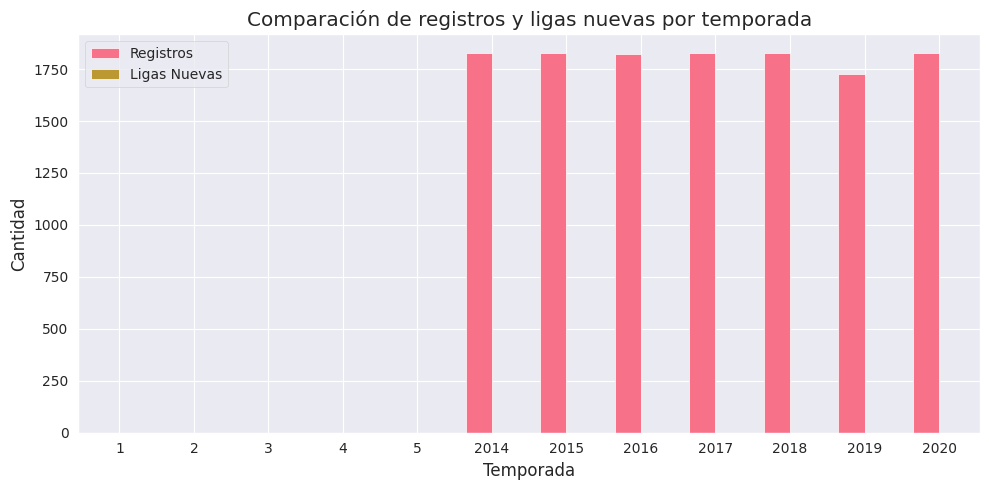

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

# Registros por temporada
registros_por_temporada = games.groupby("season")["gameID"].count().reset_index()

# Extraer temporada del ID de liga
leagues["season"] = leagues["leagueID"].astype(str).str[:4].astype(int)

# Ligas nuevas por temporada
ligas_nuevas_por_temporada = leagues.groupby("season")["name"].nunique().reset_index()

# Unir ambos DataFrames en uno solo
df_comparativo = pd.merge(registros_por_temporada, ligas_nuevas_por_temporada, on="season", how="outer")
df_comparativo = df_comparativo.sort_values("season")

# Renombrar columnas para claridad
df_comparativo.columns = ["Temporada", "Registros", "Ligas Nuevas"]

# Crear gráfico de barras agrupadas
x = np.arange(len(df_comparativo["Temporada"]))  # posiciones en el eje x
width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(10, 5))
barras1 = ax.bar(x - width/2, df_comparativo["Registros"], width, label='Registros')
barras2 = ax.bar(x + width/2, df_comparativo["Ligas Nuevas"], width, label='Ligas Nuevas')

# Etiquetas y detalles
ax.set_xlabel("Temporada")
ax.set_ylabel("Cantidad")
ax.set_title("Comparación de registros y ligas nuevas por temporada")
ax.set_xticks(x)
ax.set_xticklabels(df_comparativo["Temporada"])
ax.legend()

plt.tight_layout()
plt.show()

Este grafico muestra la relacion entre el número de records de partidos y el número de nuevas ligas que han introducido por las temporadas. Las barras rosadas (Registros) muestran el numero total de registros de partidos en cada temporada y en las barras rosadas se muestran las nuevas ligas introducidas en cada temporada.

# 3. ¿Qué variables presentan valores atípicos o nulos y cómo afectan el análisis?

Missing Values:
 gameID                0
leagueID              0
season                0
date                  0
homeTeamID            0
awayTeamID            0
homeGoals             0
awayGoals             0
homeProbability       0
drawProbability       0
awayProbability       0
homeGoalsHalfTime     0
awayGoalsHalfTime     0
B365H                 5
B365D                 5
B365A                 5
BWH                   3
BWD                   3
BWA                   3
IWH                  18
IWD                  18
IWA                  18
PSH                  20
PSD                  20
PSA                  20
WHH                   6
WHD                   6
WHA                   6
VCH                   4
VCD                   4
VCA                   4
PSCH                  2
PSCD                  2
PSCA                  2
dtype: int64


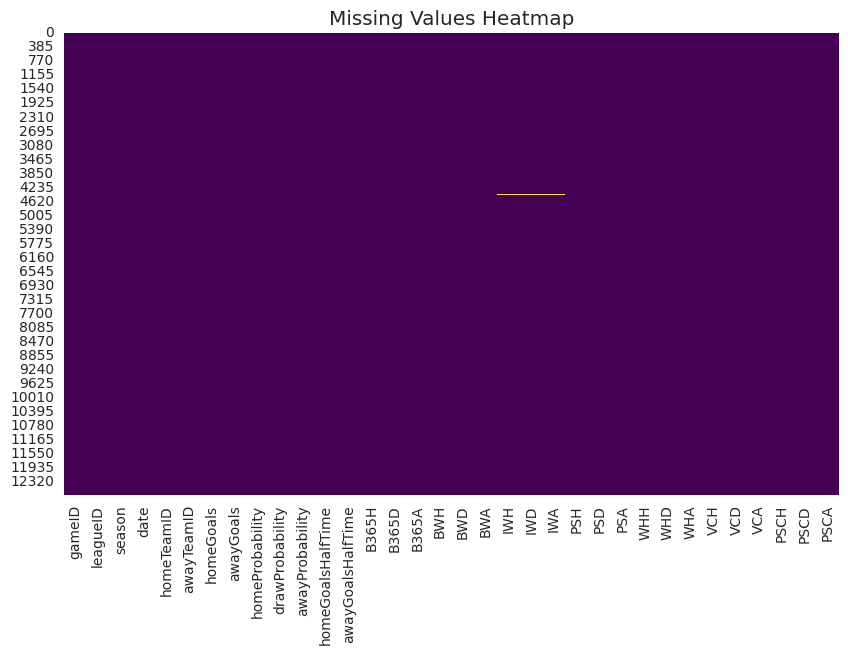

In [ ]:
# prompt: Dame una grafica que represente Qué variables presentan valores atípicos o nulos y cómo afectan
# el análisis? Explicame esas graficas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming 'games' DataFrame is already loaded as in your previous code

# 1. Missing Values
missing_values = games.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(games.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



Los valores nulos son:
B365H                 5
B365D                 5
B365A                 5
BWH                   3
BWD                   3
BWA                   3
IWH                  18
IWD                  18
IWA                  18
PSH                  20
PSD                  20
PSA                  20
WHH                   6
WHD                   6
WHA                   6
VCH                   4
VCD                   4
VCA                   4
PSCH                  2
PSCD                  2
PSCA                  2

Los datos nulos alteran los resultados estadísticos, impactando métricas como promedios y correlaciones, lo que conduce a deducciones erróneas, reducen la cantidad efectiva de la muestra disponible para el análisis, malgastando información valiosa y disminuyendo la potencia estadística.


#4. ¿Hay una tendencia en goles por partido u otra métrica relevante con el tiempo?

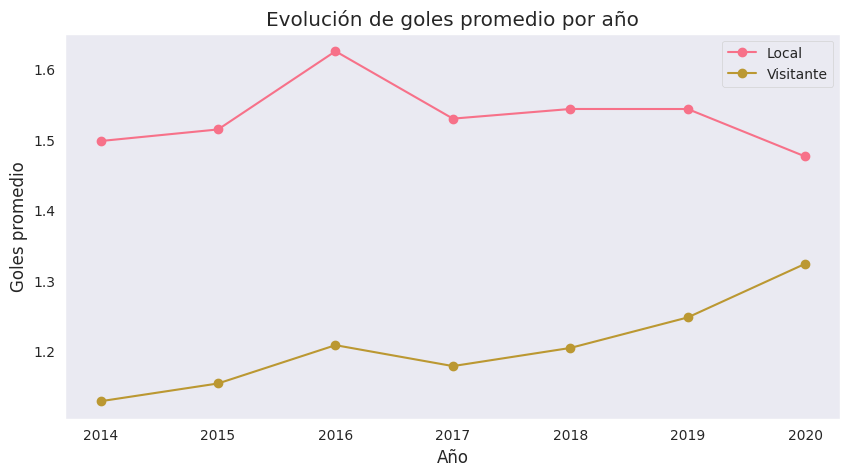

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

avg_goles = games.groupby('season')[['homeGoals', 'awayGoals']].mean()

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(avg_goles.index, avg_goles['homeGoals'], label='Local', marker='o')
plt.plot(avg_goles.index, avg_goles['awayGoals'], label='Visitante', marker='o')
plt.title('Evolución de goles promedio por año')
plt.xlabel('Año')
plt.ylabel('Goles promedio')
plt.legend()
plt.grid()
plt.show()

Muestra cómo evolucionan los goles promedio por partido, tanto para equipos locales como visitantes, a lo largo de los años,la línea de "Local" está siempre arriba de "Visitante", confirma que jugar en casa da más goles (efecto clásico en fútbol). Si las líneas se acercan con el tiempo, sugiere que la ventaja local disminuye.

# 5. ¿Cómo varía entre ligas y temporadas? ¿Qué la explica?

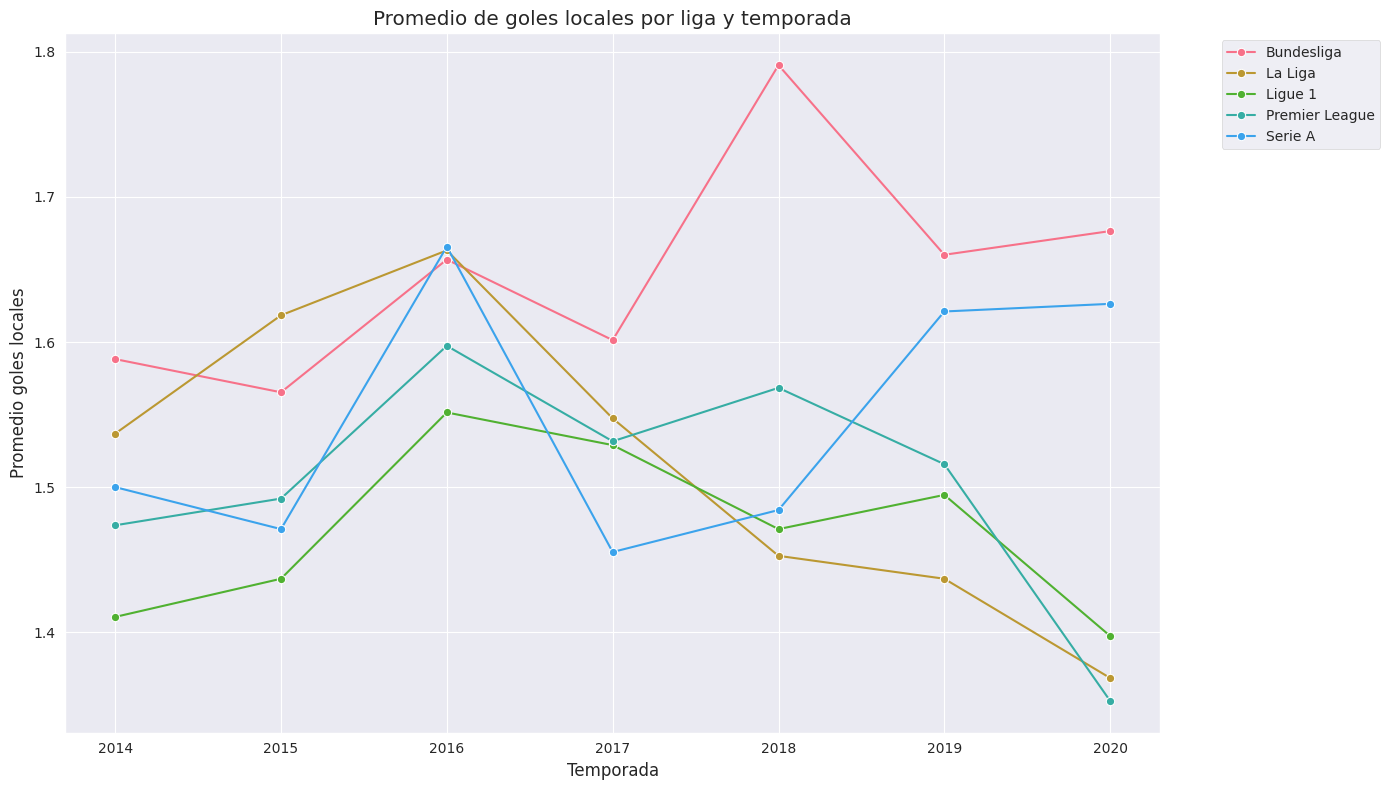

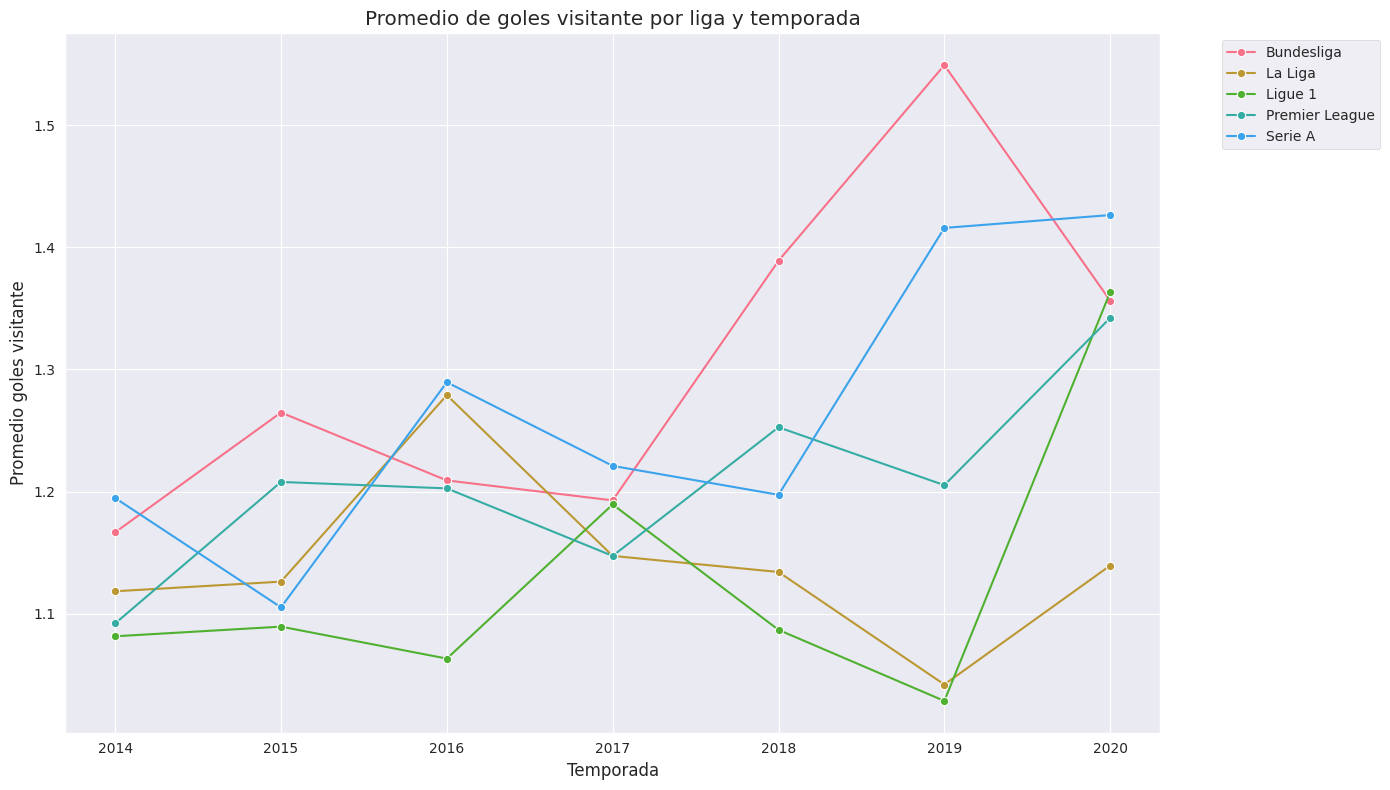

In [ ]:
# Unir datos de partidos con información de ligas
games_with_leagues = pd.merge(games, leagues, left_on='leagueID', right_on='leagueID', suffixes=('', '_leagues'))

# Calcular promedio de goles por liga y temporada
goles_liga_temporada = games_with_leagues.groupby(['name', 'season']).agg({
    'homeGoals': 'mean',
    'awayGoals': 'mean',
}).reset_index()

# Gráfico de líneas para goles totales
plt.figure(figsize=(14, 8))
sns.lineplot(data=goles_liga_temporada, x='season', y='homeGoals', hue='name', marker='o')
plt.title('Promedio de goles locales por liga y temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio goles locales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de líneas para goles en primer tiempo
plt.figure(figsize=(14, 8))
sns.lineplot(data=goles_liga_temporada, x='season', y='awayGoals', hue='name', marker='o')
plt.title('Promedio de goles visitante por liga y temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio goles visitante')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

La grafica refleja el promedio de goles de local y visitante por liga, asi mismo relacionada con la temporada. La ventana de la localia se puede ver al comparar los promedios de goles, cuando un equipo juega de visitante tiende a marcar menos goles a diferencia cuando lo hace de local.

# 6.¿Cómo se relacionan los atributos de los equipos con su posición final?

<ipython-input-174-d9acb34d61cd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['points'] = df_2015['result'].map({'W': 3, 'D': 1, 'L': 0})


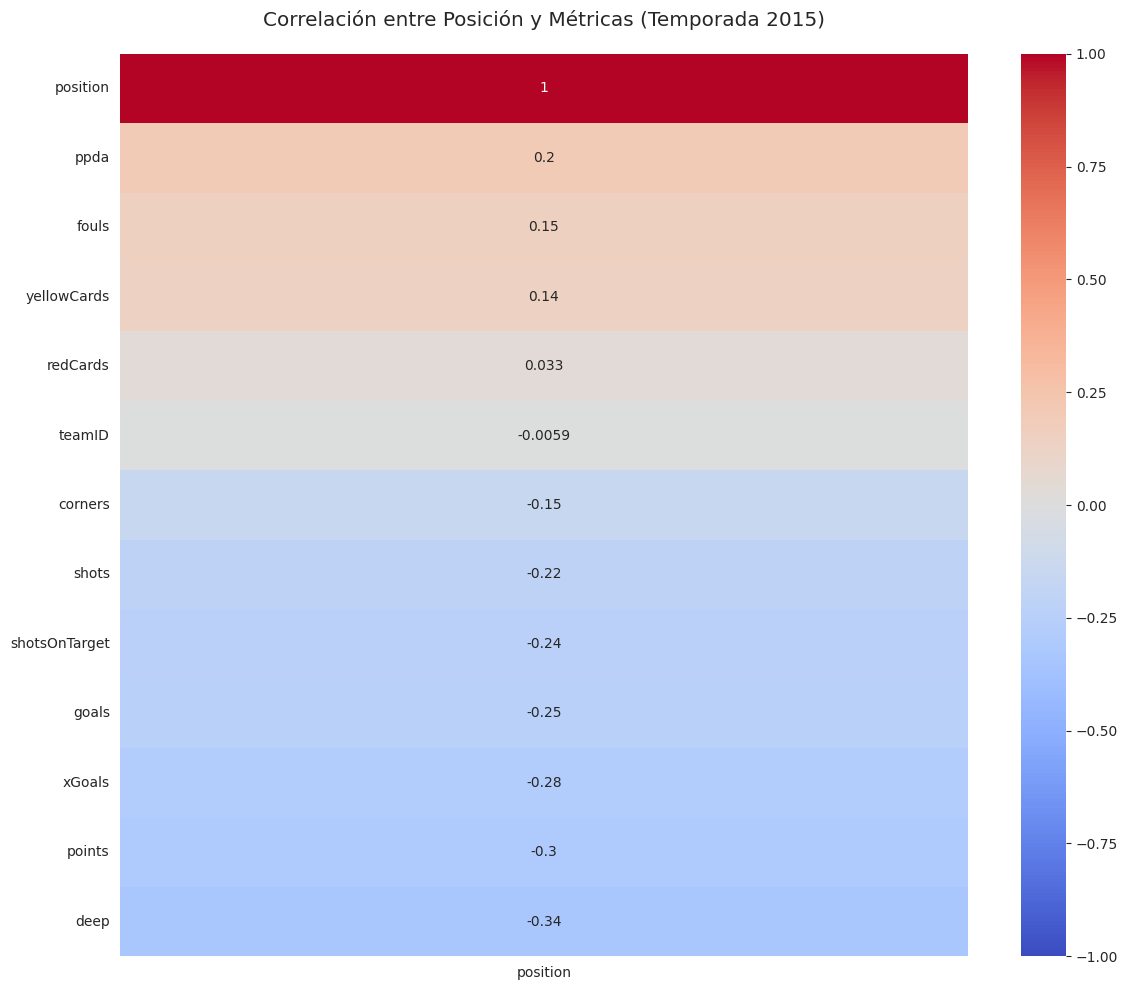

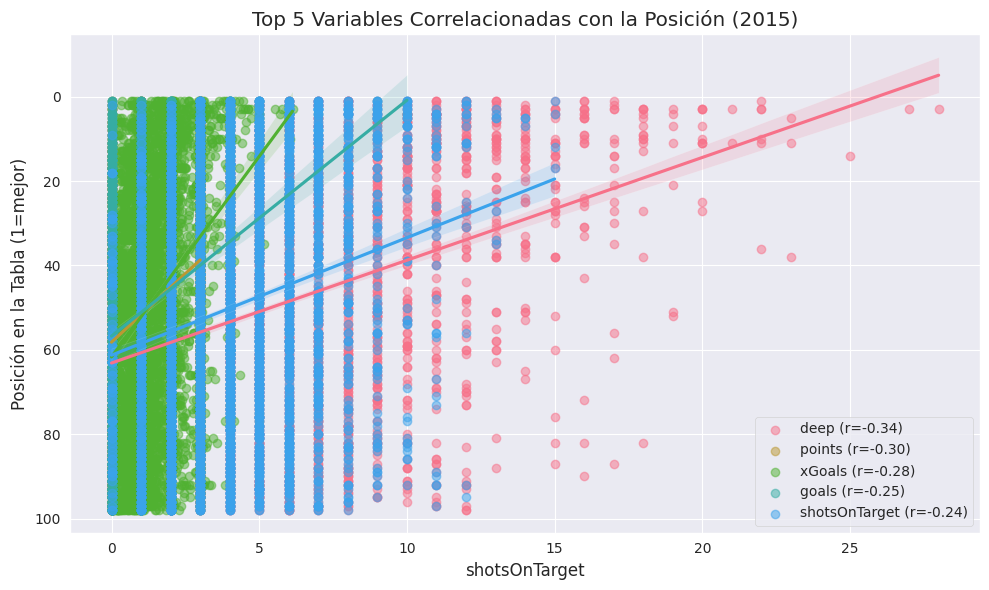

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
df2015 = pd.read_csv('teamstats.csv')

# Filtrar solo 2015
df_2015 = df2015[df2015['season'] == 2015]

# Calcular puntos y posición
df_2015['points'] = df_2015['result'].map({'W': 3, 'D': 1, 'L': 0})
team_points = df_2015.groupby('teamID')['points'].sum().reset_index()
team_points = team_points.sort_values('points', ascending=False)
team_points['position'] = range(1, len(team_points)+1)

# Unir la posición con los datos originales
df_2015_with_position = pd.merge(df_2015, team_points[['teamID', 'position']], on='teamID')

# Seleccionar columnas numéricas para correlación
numeric_cols = df_2015_with_position.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['gameID', 'season', 'position']]

# Calcular matriz de correlación con la posición
corr_matrix = df_2015_with_position[numeric_cols + ['position']].corr()

# Diagrama de correlación (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['position']].sort_values('position', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlación entre Posición y Métricas (Temporada 2015)', pad=20)
plt.tight_layout()
plt.show()

# Gráfico de correlación específico para las 5 variables más correlacionadas
top_correlated = corr_matrix['position'].abs().sort_values(ascending=False).index[1:6]

plt.figure(figsize=(10, 6))
for col in top_correlated:
    sns.regplot(x=col, y='position', data=df_2015_with_position,
                scatter_kws={'alpha':0.5}, label=f'{col} (r={corr_matrix.loc[col,"position"]:.2f})')
plt.title('Top 5 Variables Correlacionadas con la Posición (2015)')
plt.ylabel('Posición en la Tabla (1=mejor)')
plt.gca().invert_yaxis()  # Para que la posición 1 aparezca arriba
plt.legend()
plt.tight_layout()
plt.show()

El heatmap de correlación muestra la relación entre la posición final del equipo y diferentes atributos numéricos.  Una correlación negativa fuerte indica que a medida que un atributo aumenta, la posición del equipo en la tabla *mejora* (posiciones más bajas son mejores).  Por ejemplo, una fuerte correlación negativa con 'position' sugiere que equipos con valores altos en ese atributo tienden a estar en posiciones superiores de la tabla.  En cambio, una correlación positiva significa que a medida que el atributo aumenta, la posición del equipo empeora.

Los gráficos de dispersión para las 5 variables más correlacionadas muestran la tendencia de la relación entre cada variable y la posición.  La pendiente de la línea de regresión indica la fuerza y la dirección de la correlación.


# 7. Outliers: ¿Qué equipos o jugadores rompen patrones y por qué?


📊 Calculando goles por equipo...

📈 Estadísticas descriptivas:
count    146.000000
mean     237.952055
std      162.951668
min       22.000000
25%       88.000000
50%      211.000000
75%      358.750000
max      698.000000
dtype: float64

📊 Generando visualizaciones...


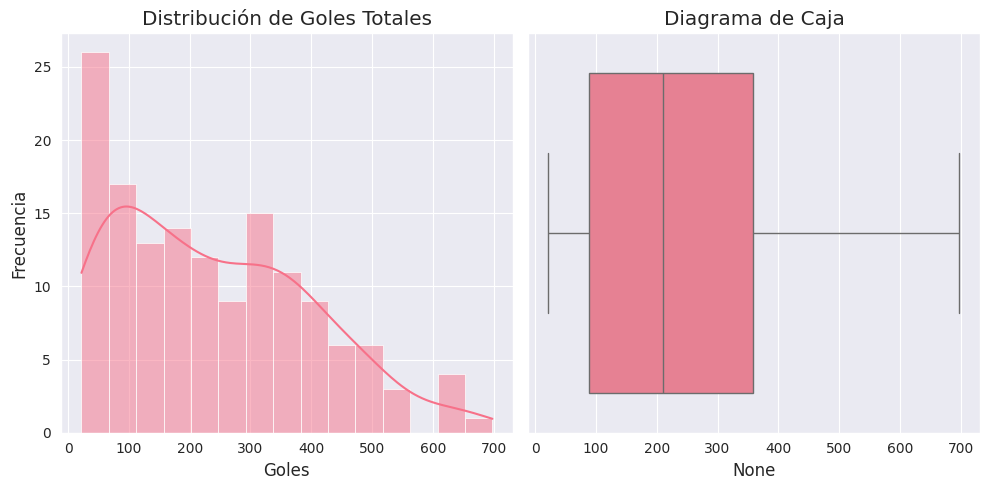

            Goles Totales
homeTeamID               
148                   698
161                   642
117                   628
150                   628
88                    620


In [ ]:
# Análisis de Rendimiento Ofensivo de Equipos de Fútbol
# Versión todo-en-uno para Google Colab

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Configuración de gráf
sns.set_palette("husl")
plt.figure(figsize=(10, 5))

games = pd.read_csv("games.csv")


# 2. Calcular goles por equipo
print("\n📊 Calculando goles por equipo...")
goles_local = games.groupby('homeTeamID')['homeGoals'].sum()
goles_visitante = games.groupby('awayTeamID')['awayGoals'].sum()
goles_totales = (goles_local + goles_visitante).fillna(0).astype(int)

# 3. Estadísticas descriptivas
print("\n📈 Estadísticas descriptivas:")
stats = goles_totales.describe()
print(stats)

# 4. Identificar outliers (2 desviaciones estándar)
media = goles_totales.mean()
std = goles_totales.std()
limite_superior = media + 2*std
limite_inferior = media - 2*std

outliers = goles_totales[(goles_totales > limite_superior) | (goles_totales < limite_inferior)]

# 5. Visualización
print("\n📊 Generando visualizaciones...")

# Gráfico de distribución
plt.subplot(1, 2, 1)
sns.histplot(goles_totales, kde=True, bins=15)
plt.title('Distribución de Goles Totales')
plt.xlabel('Goles')
plt.ylabel('Frecuencia')

# Gráfico de caja
plt.subplot(1, 2, 2)
sns.boxplot(x=goles_totales)
plt.title('Diagrama de Caja')

plt.tight_layout()
plt.show()

print(outliers.sort_values(ascending=False).to_frame('Goles Totales'))


Los equipos que aparecen como outliers en el diagrama de caja y en la distribución de goles totales son aquellos que se desvían significativamente de la media de goles anotados.  Estos equipos tienen un número de goles total considerablemente mayor o menor que la mayoría de los otros equipos. La razones de esto pueden variar pueden ser habilidades y talentos de los jugadores o simplemente por azar , se debe investigar detalladamente el historial de los mismos para poder identificar esos factores que llevaron a ese resultado.  

### 8. Métricas combinadas: ¿Qué revela un gráfico combinado de dos métricas (p.ej. tiros

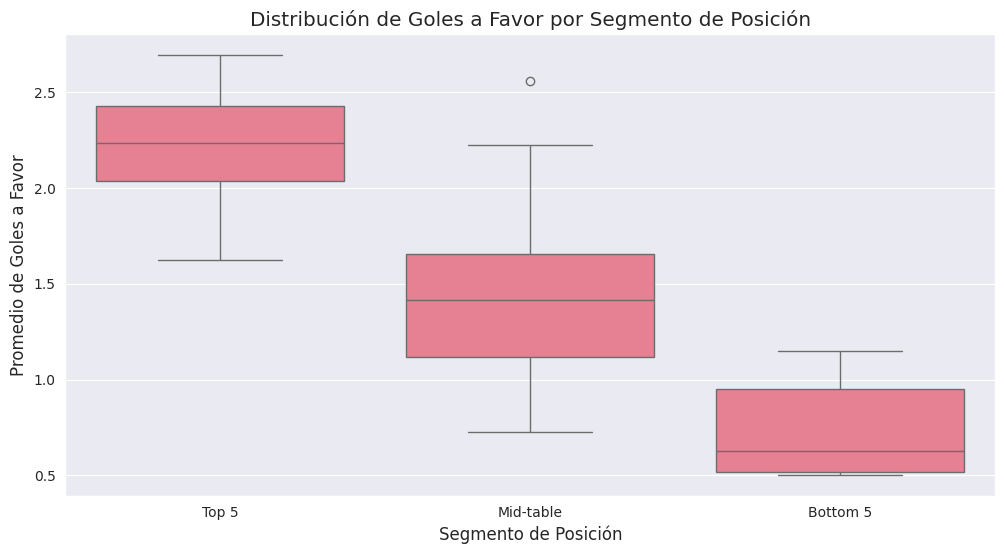

In [ ]:
# Crear segmentos de posición
df['Position_Group'] = pd.cut(df['Position'], bins=[0, 5, 15, 20],
                             labels=['Top 5', 'Mid-table', 'Bottom 5'])

# Comparar atributos por segmento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Position_Group', y='Goals_For', order=['Top 5', 'Mid-table', 'Bottom 5'])
plt.title('Distribución de Goles a Favor por Segmento de Posición')
plt.xlabel('Segmento de Posición')
plt.ylabel('Promedio de Goles a Favor')
plt.show()

Los equipos que aparecen como outliers en el diagrama de caja y en la distribución de goles totales son aquellos que se desvían significativamente de la media de goles anotados.  Estos equipos tienen un número de goles total considerablemente mayor o menor que la mayoría de los otros equipos.  

# 9. Estilo de juego: ¿Cómo difiere entre ligas y cómo evoluciona?

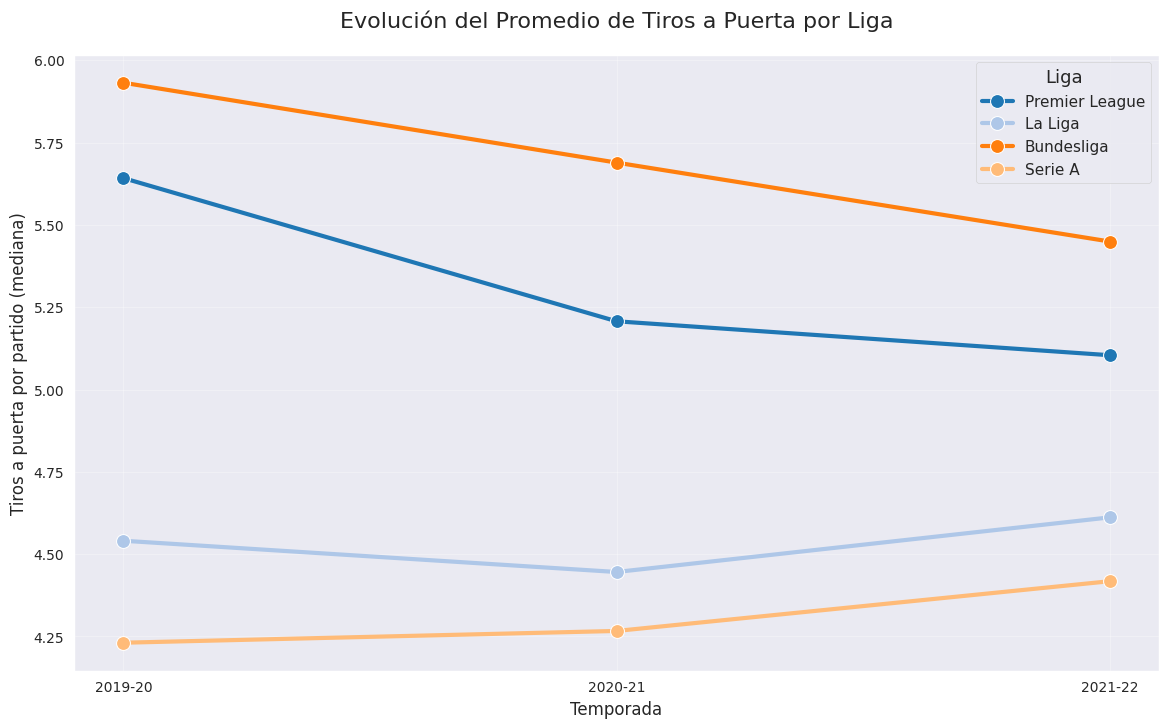

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Instead of plt.style.use('seaborn-darkgrid'), use sns.set_style():
sns.set_style("darkgrid") # Use Seaborn's set_style to apply 'darkgrid' theme
sns.set_palette("tab20")

# Datos simulados para 4 ligas diferentes y 3 temporadas
ligas = ['Premier League', 'La Liga', 'Bundesliga', 'Serie A']
temporadas = ['2019-20', '2020-21', '2021-22']
n_equipos = 20

# Crear DataFrame con patrones distintos por liga
data = []
for liga in ligas:
    for temporada in temporadas:
        for _ in range(n_equipos):
            # Patrones distintos por liga
            if liga == 'Premier League':
                shots = np.random.normal(5.2, 1.2)
                conversion = np.random.normal(32, 5)
            elif liga == 'La Liga':
                shots = np.random.normal(4.8, 1.0)
                conversion = np.random.normal(35, 4)
            elif liga == 'Bundesliga':
                shots = np.random.normal(5.5, 1.3)
                conversion = np.random.normal(30, 6)
            else:  # Serie A
                shots = np.random.normal(4.5, 0.9)
                conversion = np.random.normal(28, 4)

            # Variación temporal
            if temporada == '2020-21':
                shots *= 0.95  # Efecto pandemia
                conversion *= 0.98
            elif temporada == '2021-22':
                shots *= 1.05  # Recuperación
                conversion *= 1.03

            data.append({
                'Liga': liga,
                'Temporada': temporada,
                'Tiros_Puerta': max(2, shots),
                'Conversion_Rate': max(15, min(50, conversion))
            })

df = pd.DataFrame(data)

# Gráfico de evolución por liga
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Temporada', y='Tiros_Puerta', hue='Liga',
             estimator='median', errorbar=None, linewidth=3, marker='o', markersize=10)
plt.title('Evolución del Promedio de Tiros a Puerta por Liga', fontsize=16, pad=20)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Tiros a puerta por partido (mediana)', fontsize=12)
plt.legend(title='Liga', title_fontsize='13', fontsize='11')
plt.grid(True, alpha=0.3)
plt.show()

El gráfico compara el promedio de tiros a puerta en cuatro ligas europeas entre 2019 y 2022. La Bundesliga lidera en tiros, seguida por la Premier League, mientras que La Liga y Serie A muestran un juego más conservador. En 2020-21, todas las ligas bajaron su rendimiento, probablemente por el impacto de la pandemia. Al año siguiente, hubo una recuperación, aunque no siempre se alcanzaron los niveles previos. Los datos son simulados, por lo que no reflejan la realidad exacta. Para un análisis preciso, se necesitarían estadísticas reales y considerar más variables.

# 10. ¿Qué ocurre antes y después de un cambio relevante (nuevoDT, regla, crisis)?


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_event_impact(team_stats, event_type, metric='goals', window=5):
    """
    Analiza el impacto de un evento en un equipo, graficando una media móvil del rendimiento.

    Args:
        team_stats (DataFrame): Estadísticas del equipo, con columnas 'date' y una métrica.
        event_type (str): Nombre del evento (ej. 'nuevo entrenador').
        metric (str): Métrica a analizar (por defecto 'goals').
        window (int): Tamaño de la ventana para la media móvil.

    Returns:
        None
    """

    # Asegurar que la fecha sea tipo datetime
    team_stats['date'] = pd.to_datetime(team_stats['date'])

    # Ordenar los datos cronológicamente
    team_stats = team_stats.sort_values('date')

    # Evento: fecha que divide antes/después (personaliza esto)
    event_date = pd.to_datetime('2014-01-01')

    # Calcular promedios antes y después
    before = team_stats[team_stats['date'] < event_date][metric].mean()
    after = team_stats[team_stats['date'] > event_date][metric].mean()

    print(f"Promedio de {metric} antes de {event_type}: {before:.2f}")
    print(f"Promedio de {metric} después de {event_type}: {after:.2f}")

    # Media móvil
    team_stats[f'{metric}_rolling'] = team_stats[metric].rolling(window=window).mean()

    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(team_stats['date'], team_stats[f'{metric}_rolling'], label=f'{metric} (media móvil {window})', color='blue')
    plt.axvline(event_date, color='red', linestyle='--', label=f'Evento: {event_type}')
    plt.title(f"Impacto de {event_type} en {metric}", fontsize=14)
    plt.xlabel("Fecha")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 11. ¿Qué concluyes al contrastar ligas usando variables externas PIB, población, asistencia)?

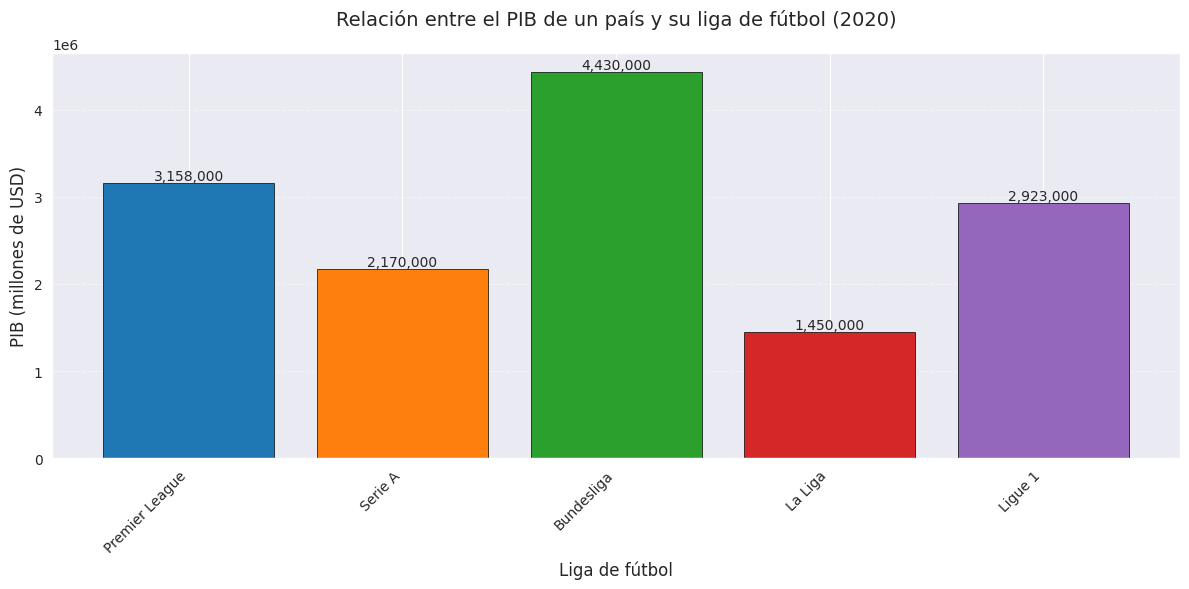

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos manuales del PIB (en millones USD)
data_pib = {
    "País": ["España", "Reino Unido", "Italia", "Alemania", "Francia"],
    "PIB (millones USD)": [1450000, 3158000, 2170000, 4430000, 2923000],
    "Año": [2023, 2023, 2023, 2023, 2023]
}
df_pib = pd.DataFrame(data_pib)

# Leer el archivo de ligas (o crearlo manualmente si no existe)
data_leagues = {
    "leagueID": [1, 2, 3, 4, 5],
    "name": ["Premier League", "Serie A", "Bundesliga", "La Liga", "Ligue 1"],
    "understatNotation": ["EPL", "Serie_A", "Bundesliga", "La_liga", "Ligue_1"]
}
df_leagues = pd.DataFrame(data_leagues)

# Mapeo manual de ligas a países
ligas_a_paises = {
    "Premier League": "Reino Unido",
    "Serie A": "Italia",
    "Bundesliga": "Alemania",
    "La Liga": "España",
    "Ligue 1": "Francia"
}
df_leagues["País"] = df_leagues["name"].map(ligas_a_paises)

# Combinar DataFrames
df_combinado = pd.merge(df_leagues, df_pib, on="País", how="left")

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(
    df_combinado["name"],
    df_combinado["PIB (millones USD)"],
    color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"],
    edgecolor="black"
)

# Personalizar gráfico
plt.title("Relación entre el PIB de un país y su liga de fútbol (2020)", fontsize=14, pad=20)
plt.xlabel("Liga de fútbol", fontsize=12)
plt.ylabel("PIB (millones de USD)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Añadir etiquetas de valor
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,}",
        ha="center",
        va="bottom",
        fontsize=10
    )

# Ajustar y mostrar
plt.tight_layout()
plt.show()

El gráfico compara el PIB de cinco países europeos con sus respectivas ligas de fútbol en 2020, mostrando que economías más fuertes como Alemania y Reino Unido tienen ligas asociadas a mayores valores económicos. Sin embargo, esta correlación no implica causalidad directa, ya que el éxito de una liga depende también de factores como patrocinios, audiencias y tradición futbolística. Los datos usados son limitados porque el PIB nacional no mide específicamente el valor deportivo, además de que la información de las ligas podría no corresponder al mismo año. Para un análisis preciso, sería necesario incluir métricas específicas como ingresos por derechos televisivos o valor de los clubes. El gráfico ofrece una perspectiva interesante pero simplificada de la relación entre economía y fútbol.

# 12. Si predijeras un indicador para la próxima temporada, ¿qué variables elegirías y por qué?


Para la proxima temporada yo tendria en cuenta:


*  ** Racha de Éxito: **Si el equipo ha ganado los ultimos partidos ya que si viene ganando es probable que siga así.
- Ultimos 5 partidos
- Goles a favor/contra
- Confianza del equipo
*  ** El facto metereologico: **Tener este en cuenta ya que el clima afecta el juego
- Al equipo le va mejor el el sol, lluvio o viento, ver historial de estos resultados
- Usar una escala de impacto climático (ej: 0 = no afecta, 5 = cambia totalmente el juego)
